# ETF 均线测试
**目的** 
通过从tushuare下载ETF300， ETF500， ETF50 数据。
回测计算均线穿越法的收益。

[ETF50 & ETF500 Pair trading 策略][5]

[5]: https://blog.csdn.net/hongxkex/article/details/90108038

## 期望
在概率论和统计学中，期望是试验中每次可能结果的概率乘以其结果的总和，反映一
组数据平均取值的大小，用于表示分布的中心位置。
在生活中 ，我们对未知事件有一个预期， 也就是我们的期望。比如我们会根据一般的
狗的孕产周期，来期望自家小狗的孕产周期（猫三狗囚〉，而不会期望 10 个月 生下小狗。
期望公式： mean(X) = µ = L; P;X;
所谓期望就是平均值.
## 方差
在概率论和统计学中，方差是衡量一组数据离散程度的度量，概率论中方差用来度量
数据和其期望之间的离散程度，方差越大，说明数据越离散。
方差公式： Var(X) ＝ σ2 = mean((X 一 µ)2)
## 标准差
标准差为方差的算术平方根 ， 标准差和变量的计算单位相同 ，所以比方差清晰。因此
很多时候在分析时使用更多的是标准差 ， 方差与标准差都可以用于表示分布的离散程度。
标准差公式 ： Std(X) ＝ σ
回到股票市场示例，如果有 a、 b 两个交易者，他们多次交易的平均战果都是赚 100
兀，那么他们两个人的期望都是 1 00，但是 a 交易者获利的获利稳定性不好，假设振 llli为
50 即标准差 为 50, b 交易者获利的获利稳定性 比 a 好，假设振幅为 20 ，即标准差为 20,
示例如下 ：

In [1]:
import pandas as pd
import numpy as np
import tushare as ts
import seaborn
from matplotlib import pyplot as plt
import talib
plt.style.use('seaborn')
%matplotlib inline


In [2]:
token = 'ac6023f80d316aafe035fa47ce6551edcc5ac790921df9d262320d2b'
ts.set_token(token)


对于tushare pro，需要设置token

In [3]:
pro = ts.pro_api()
df = pro.fund_daily(ts_code='510500.SH', start_date='20150101', end_date='20191010')

ETF500的ts_code 为510500.SH

In [4]:
df.head(10)


,ts_code,trade_date,pre_close,open,high,low,close,change,pct_chg,vol,amount
0,510500.SH,20191010,5.384,5.381,5.455,5.370,5.443,0.059,1.0958,1915680.81,1036889.861
1,510500.SH,20191009,5.337,5.327,5.391,5.300,5.384,0.047,0.8806,1802342.69,963839.709
2,510500.SH,20191008,5.325,5.342,5.398,5.334,5.337,0.012,0.2254,1658717.87,889927.802
3,510500.SH,20190930,5.401,5.401,5.420,5.302,5.325,-0.076,-1.4071,1619834.74,868653.992
4,510500.SH,20190927,5.376,5.385,5.431,5.383,5.401,0.025,0.4650,1701922.74,920008.160
5,510500.SH,20190926,5.501,5.511,5.516,5.373,5.376,-0.125,-2.2723,3014710.58,1639038.909
6,510500.SH,20190925,5.589,5.561,5.564,5.497,5.501,-0.088,-1.5745,1973007.55,1089520.860
7,510500.SH,20190924,5.587,5.579,5.663,5.576,5.589,0.002,0.0358,2385042.44,1339153.070
8,510500.SH,20190923,5.610,5.601,5.601,5.534,5.587,-0.023,-0.4100,2105835.52,1169452.609
9,510500.SH,20190920,5.601,5.605,5.631,5.589,5.610,0.009,0.1607,1980023.05,1110871.182


In [5]:
len(df)

1000

似乎一次最多只能获取1000条数据。这就涉及到需要下载多条合并的问题。另外取出来的数据的时间是倒序的。

In [6]:
print(df.shape[0],df.shape[1]) #计算行数和列数

1000 11


In [8]:
etf500 = df.sort_values(by='trade_date')

In [9]:
etf500.head(3)

,ts_code,trade_date,pre_close,open,high,low,close,change,pct_chg,vol,amount
999,510500.SH,20150827,6.236,6.400,6.548,6.100,6.500,0.264,4.2335,430115.97,274730.729
998,510500.SH,20150828,6.500,6.615,6.920,6.481,6.891,0.391,6.0154,513621.01,342252.050
997,510500.SH,20150831,6.891,6.825,6.825,6.570,6.621,-0.270,-3.9182,422786.00,282270.152


In [18]:
closed = etf500[['trade_date','close']]
closed.head()

,trade_date,close
999,20150827,6.500
998,20150828,6.891
997,20150831,6.621
996,20150901,6.166
995,20150902,6.011


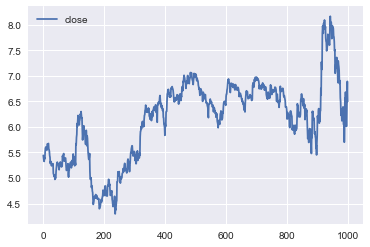

In [19]:
closed.plot()


数据按时间倒着排的,需要把它转过来.

In [23]:
closed.index

Int64Index([999, 998, 997, 996, 995, 994, 993, 992, 991, 990,
            ...
              9,   8,   7,   6,   5,   4,   3,   2,   1,   0],
           dtype='int64', length=1000)

In [25]:
closed['trade_date'] = pd.to_datetime(closed['trade_date'],format='%Y%m%d')

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


将trade_date 转化为日期

In [26]:
closed.head()

,trade_date,close
999,2015-08-27,6.500
998,2015-08-28,6.891
997,2015-08-31,6.621
996,2015-09-01,6.166
995,2015-09-02,6.011


In [28]:
closed.set_index('trade_date',inplace=True)

重新设置dateframe的索引.

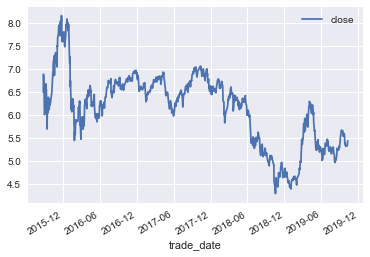

In [29]:
closed.plot()

计算MA2 和MA20

In [30]:
closed['MA2'] = talib.SMA(closed.close,timeperiod=2)
closed.head()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,close,MA2
trade_date,,
2015-08-27,6.500,NaN
2015-08-28,6.891,6.6955
2015-08-31,6.621,6.7560
2015-09-01,6.166,6.3935
2015-09-02,6.011,6.0885


SettingWithCopyWarning 警告:

[清除SettingWithCopyWarning][2]

[2]:https://www.jianshu.com/p/72274ccb647a

In [31]:
closed['MA20']=talib.SMA(closed.close,timeperiod=20)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


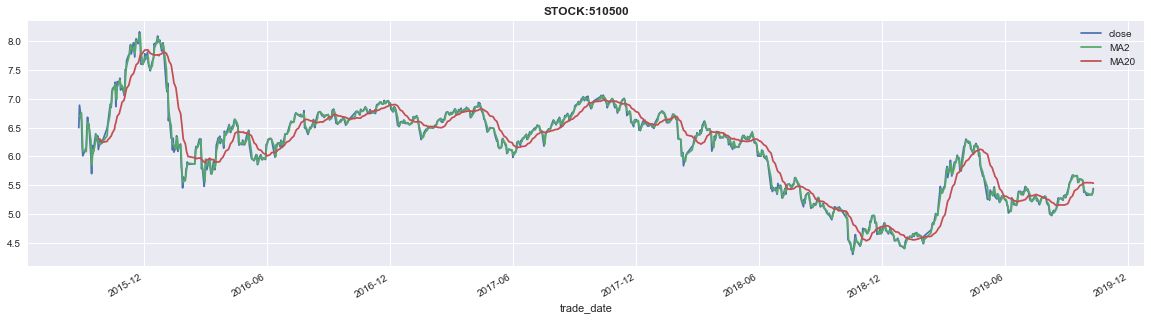

In [35]:
closed.plot(figsize=(20,5))
plt.title("STOCK:510500", weight='bold');

计算收益率曲线.

In [40]:
closed['pct_chg']=closed.close.pct_change()


d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


pct_chang()计算出每天变化的百分比

In [41]:
closed.head()

,close,MA2,MA20,pct_chg
trade_date,,,,
2015-08-27,6.500,NaN,NaN,NaN
2015-08-28,6.891,6.6955,NaN,0.060154
2015-08-31,6.621,6.7560,NaN,-0.039182
2015-09-01,6.166,6.3935,NaN,-0.068721
2015-09-02,6.011,6.0885,NaN,-0.025138


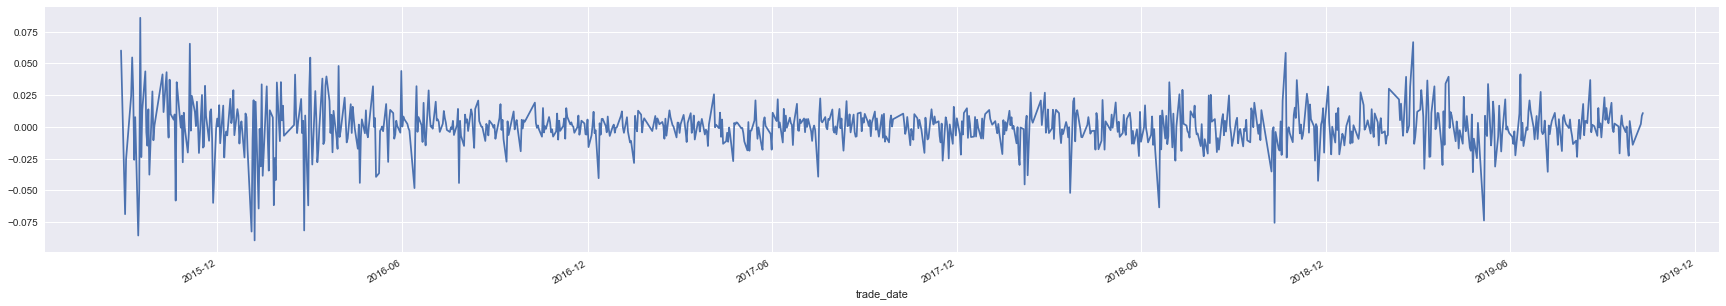

In [39]:
closed['pct_chg'].plot(figsize=(30,5))

In [42]:
np.max(closed['pct_chg'])

0.08594983336256812

In [43]:
np.min(closed['pct_chg'])

-0.0893839383938394

In [44]:
closed.describe()

,close,MA2,MA20,pct_chg
count,1000.000000,999.000000,981.000000,999.000000
mean,6.148337,6.148514,6.152664,-0.000033
std,0.785128,0.783572,0.767804,0.016945
min,4.297000,4.341500,4.532550,-0.089384
25%,5.486500,5.474500,5.478850,-0.006936
50%,6.317500,6.314000,6.323150,0.000377
75%,6.684000,6.688500,6.672500,0.007646
max,8.167000,8.129500,7.853750,0.085950


通过describe(),获取各项数据的情况.510500的最多涨跌幅度为8%左右. 下面继续看看涨跌幅度最大的几天.

In [71]:
closed.loc[np.abs(closed['pct_chg']) >0.065 ] #算出收益率变化最大的几天

,close,MA2,MA20,pct_chg
trade_date,,,,
2015-09-01,6.166,6.3935,NaN,-0.068721
2015-09-14,5.998,6.2785,NaN,-0.085531
2015-09-16,6.191,5.9460,NaN,0.085950
2015-11-04,7.512,7.2810,7.08320,0.065532
2016-01-04,7.192,7.5150,7.79280,-0.082419
2016-01-07,6.622,6.9470,7.69330,-0.089384
2016-02-25,5.789,6.0460,5.95380,-0.081548
2018-10-11,4.554,4.7400,4.99690,-0.075518
2019-02-25,5.479,5.3075,4.78835,0.066783


(array([ 57.,  53., 132.,  70., 132., 256., 230.,  28.,  18.,  24.]),
 array([4.297, 4.684, 5.071, 5.458, 5.845, 6.232, 6.619, 7.006, 7.393,
        7.78 , 8.167]),
 <a list of 10 Patch objects>)

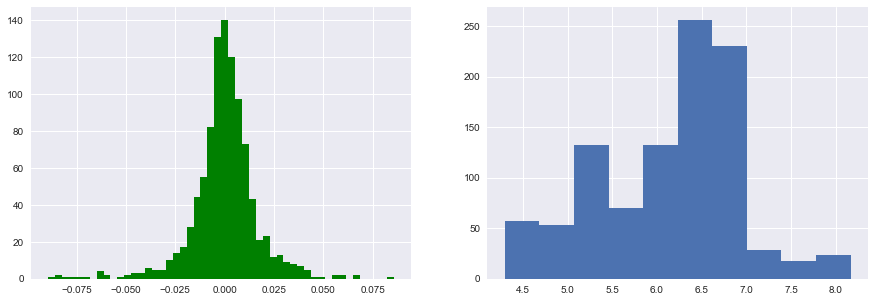

In [94]:
#
fig,axes = plt.subplots(1,2,figsize=(15,5)) 
axes[0].hist(closed['pct_chg'].dropna(),color='g',bins=50)
axes[1].hist(closed['close'].dropna())

>正态分布（ normal distribution ）是常用的概率分布 。 正态分布又被称为高斯分布
( gauss distribution ），因为高斯在 1809 年使用 该分布来预测星体位置 ，正态曲线呈钟形，
两头低，中间高，左右对称，因此又被称之为钟形曲线 。

正态分布的特点：
- 对于正态分布，数据的标准差越大，数据分布离散程度越大 ；
- 对于正态分布，数据的期望位于曲线的对称轴中 心 。

画出正态分布曲线和增益率的关系

In [97]:
closed['log_ret'] = np.log(closed.close/closed.close.shift(1)) #计算对数收益率

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


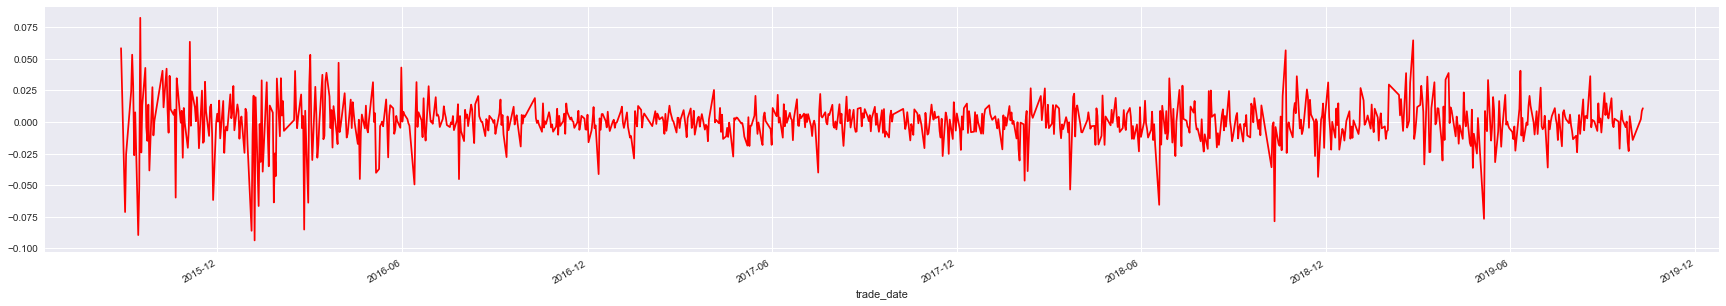

In [106]:
closed['log_ret'].plot(figsize=(30,5),color='r') #输出对数收益率


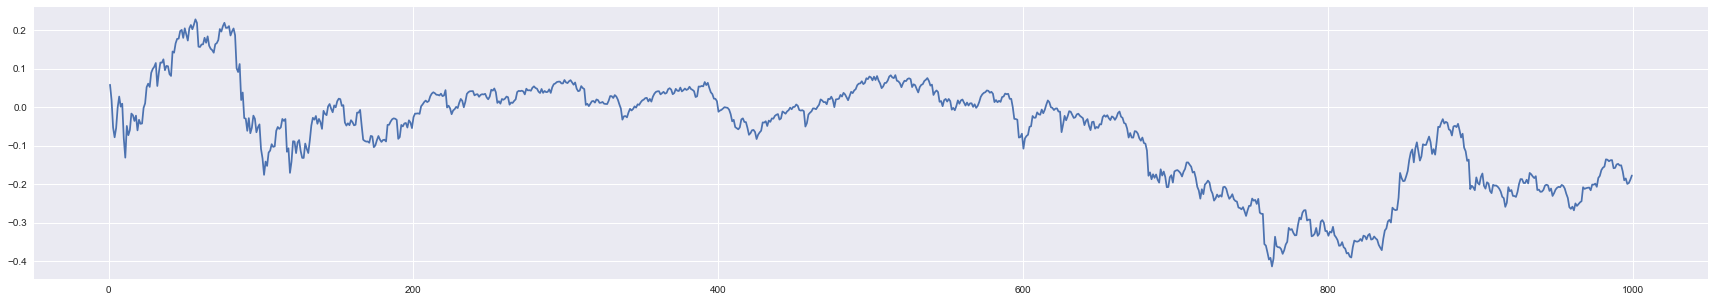

In [131]:
cumulative_rets = closed.log_ret.cumsum().values #对数收益率进行累计求和,可以计算出所有时间点持有的收益率
plt.figure(figsize=(30, 5))
plt.plot(cumulative_rets)

计算MA2 穿越MA10的点

In [136]:
diff_ma2_ma20 = closed.MA2-closed.MA20

In [137]:
closed['hold'] = np.where(closed.MA2 >closed.MA20,closed.MA2,0)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [138]:
closed.head()

,close,MA2,MA20,pct_chg,log_ret,hold
trade_date,,,,,,
2015-08-27,6.500,NaN,NaN,NaN,NaN,0.0
2015-08-28,6.891,6.6955,NaN,0.060154,0.058414,0.0
2015-08-31,6.621,6.7560,NaN,-0.039182,-0.039970,0.0
2015-09-01,6.166,6.3935,NaN,-0.068721,-0.071196,0.0
2015-09-02,6.011,6.0885,NaN,-0.025138,-0.025459,0.0


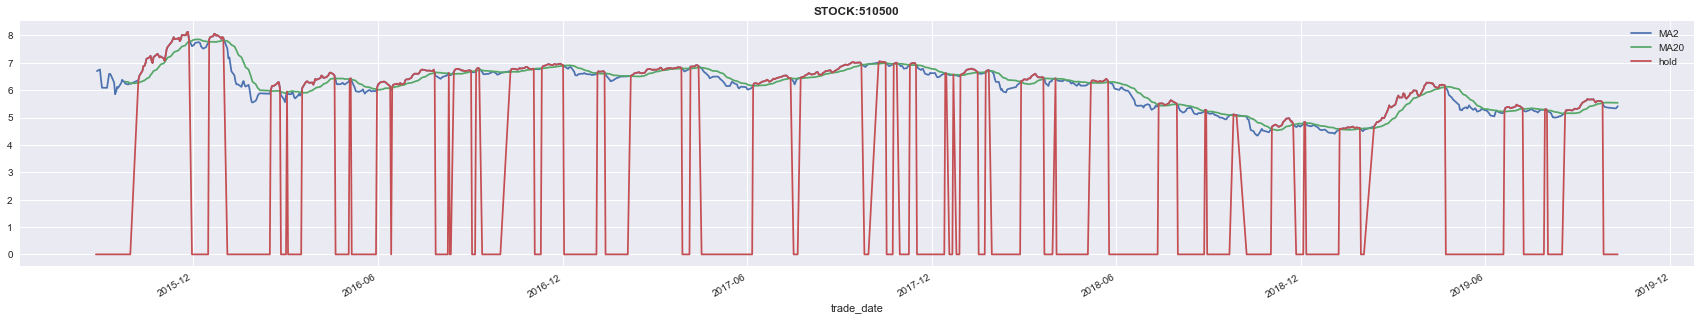

In [139]:
closed[['MA2','MA20','hold']].plot(figsize=(30,5))
plt.title("STOCK:510500", weight='bold');

In [143]:
stragy_ret = np.where(closed.hold >0,closed.log_ret, 0)

In [144]:
stragy_ret= stragy_ret.cumsum()


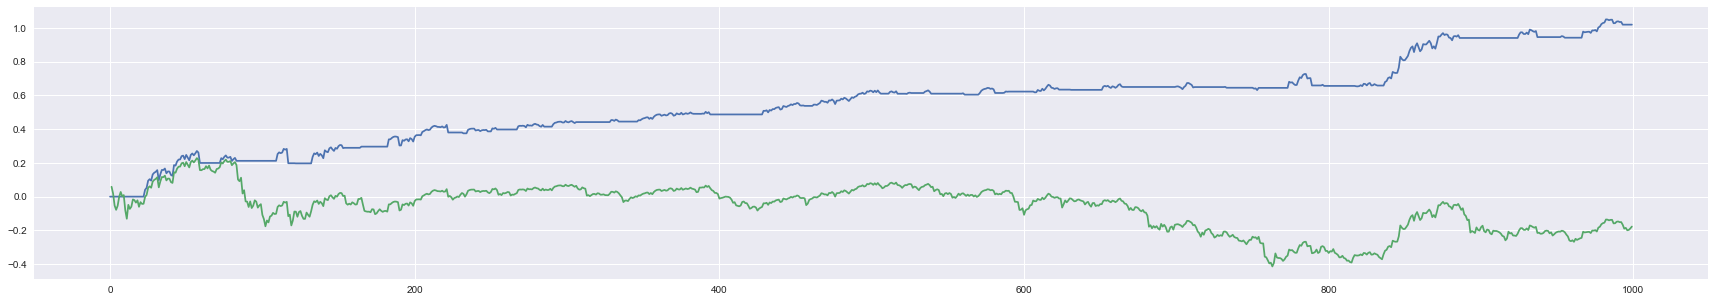

In [145]:
plt.figure(figsize=(30, 5))

plt.plot(stragy_ret)
plt.plot(cumulative_rets)

In [148]:
print("strage= {},hold ={}".format(np.exp(stragy_ret[-1]),np.exp(cumulative_rets[-1])))

strage= 2.7722754256654154,hold =0.8373846153846146


In [ ]:
通过log求和计算处理的收益率和直接计算的结果对比.

In [149]:
closed.close[-1]/closed.close[0]

0.8373846153846153